# **RFM Analysis: Insights into E-Commerce Customer Behavior & Sales Analysis**

## Latar Belakang

Dalam industri e-commerce, memahami perilaku pelanggan menjadi tantangan penting karena setiap pelanggan memiliki pola pembelian yang berbeda. Tanpa analisis yang tepat, strategi pemasaran sering tidak tepat sasaran dan retensi pelanggan menurun.

Salah satu metode yang banyak digunakan untuk tujuan tersebut adalah RFM Analysis, yang mengukur perilaku pelanggan berdasarkan tiga aspek utama:

1. Recency: kapan terakhir kali pelanggan bertransaksi

2. Frequency: seberapa sering mereka berbelanja

3. Monetary: seberapa besar jumlah pengeluaran mereka

Melalui analisis ini, perusahaan dapat membuat keputusan yang lebih tepat untuk meningkatkan retensi, efisiensi pemasaran, dan nilai bisnis secara keseluruhan.

## Pernyataan Masalah
Perusahaan e-commerce sering menghadapi kesulitan dalam memahami perbedaan perilaku pelanggan, sehingga strategi pemasaran dan retensi tidak berjalan secara optimal. Data transaksi yang besar belum dimanfaatkan dengan baik untuk mengidentifikasi pelanggan yang paling bernilai, pelanggan yang mulai tidak aktif, maupun pelanggan yang berpotensi churn.

Oleh karena itu, diperlukan analisis yang mampu mengelompokkan pelanggan berdasarkan pola pembelian mereka. RFM Analysis dipilih sebagai metode untuk membantu perusahaan memahami perilaku pelanggan secara lebih akurat dan menyusun strategi yang lebih tepat sasaran.

Bagaimana e-commerce dapat mengelompokkan pelanggan secara efektif berdasarkan perilaku pembelian mereka untuk meningkatkan retensi dan mengoptimalkan strategi pemasaran?

# Stakeholders: Marketing Department of E-commerce Company in Turkey

# Data Understanding


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi 18 kolom informasi terkait transaksi e-commerce, yang mencakup identitas pelanggan, detail produk yang dibeli, aktivitas pelanggan selama sesi belanja, metode pembayaran, serta pengalaman pembelian seperti waktu pengiriman dan rating pelanggan. Data ini mencerminkan perilaku pelanggan baik dari sisi transaksi maupun interaksi mereka selama proses pembelian.
- Order_ID: Unique identifier for each order
- Customer_ID: Unique identifier for each customer
- Date: Date of the transaction
- Age: Customer’s age
- Gender: Customer gender
- City: Customer’s city
- Product_Category: Category of product purchased
- Unit_Price: Price per unit of the product
- Quantity: Number of units purchased
- Discount_Amount: Discount applied to the order
- Total_Amount: Final amount paid
- Payment_Method: Payment method used
- Device_Type: Device used during the purchase
- Session_Duration_Minutes: Duration of browsing session
- Pages_Viewed: Number of pages viewed
- Is_Returning_Customer: Indicates whether the customer is returning
- Delivery_Time_Days: Delivery duration
- Customer_Rating: Customer satisfaction rating

Berikut 5 baris teratas dan terbawah dari dataset E-commerce Customer Behavior & Sales Analysis

In [4]:
df=pd.read_csv('/content/ecommerce_customer_behavior_dataset_v2.csv',sep="\,")
display(df.head(),df.tail())

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4


,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
17044,ORD_004999-1,CUST_04999,2024-01-16,44,Male,Antalya,Beauty,68.65,2,0.00,137.30,Digital Wallet,Mobile,14,10,False,6,1
17045,ORD_005000-1,CUST_05000,2023-02-22,24,Female,Eskisehir,Beauty,156.12,1,0.00,156.12,Credit Card,Mobile,15,8,True,7,5
17046,ORD_005000-2,CUST_05000,2023-06-29,24,Female,Eskisehir,Home & Garden,1065.24,3,0.00,3195.72,Credit Card,Desktop,17,11,True,5,4
17047,ORD_005000-3,CUST_05000,2023-12-29,24,Female,Eskisehir,Books,47.73,2,8.80,86.66,Credit Card,Desktop,13,11,True,12,2
17048,ORD_005000-4,CUST_05000,2024-01-19,24,Female,Eskisehir,Home & Garden,1015.23,4,217.01,3843.91,Credit Card,Mobile,15,7,True,3,4


## Data Cleaning
Sebelum memasuki tahap analisis, langkah pertama yang perlu dilakukan adalah memahami struktur dan karakteristik dataset melalui proses data understanding. Tahap ini membantu kita mengidentifikasi berbagai anomali, ketidaksesuaian data, maupun potensi masalah yang dapat memengaruhi hasil analisis.

Temuan yang diperoleh pada tahap data understanding kemudian digunakan sebagai dasar untuk melakukan data cleaning. Setiap tindakan perbaikan—seperti penanganan missing value, penghapusan outlier, atau perbaikan tipe data—akan diberikan justifikasi yang jelas, baik berdasarkan domain knowledge maupun pertimbangan statistik. Dengan demikian, proses pembersihan data dapat dilakukan secara tepat, objektif, dan tetap menjaga integritas informasi pada dataset.

In [5]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (17049, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  17049 non-null  object 
 1   Customer_ID               17049 non-null  object 
 2   Date                      17049 non-null  object 
 3   Age                       17049 non-null  int64  
 4   Gender                    17049 non-null  object 
 5   City                      17049 non-null  object 
 6   Product_Category          17049 non-null  object 
 7   Unit_Price                17049 non-null  float64
 8   Quantity                  17049 non-null  int64  
 9   Discount_Amount           17049 non-null  float64
 10  Total_Amount              17049 non-null  float64
 11  Payment_Method            17049 non-null  object 
 12  Device_Type               17049 non-null  object 
 13  Sessi

Type variable Date diubah dari object menjadi datetime agar lebih sesuai dengan tipe data

In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [7]:
display(df.describe().T, df.describe(include='object').T)

,count,mean,min,25%,50%,75%,max,std
Date,17049,2023-08-15 01:33:09.723737344,2023-01-01 00:00:00,2023-04-26 00:00:00,2023-08-16 00:00:00,2023-12-06 00:00:00,2024-03-25 00:00:00,NaN
Age,17049.0,34.945745,18.0,26.0,35.0,42.0,75.0,11.046855
Unit_Price,17049.0,447.901689,5.05,73.26,174.68,494.57,7900.01,722.319705
Quantity,17049.0,3.011379,1.0,2.0,3.0,4.0,5.0,1.417027
Discount_Amount,17049.0,69.788135,0.0,0.0,0.0,32.71,6538.29,240.704662
Total_Amount,17049.0,1277.438711,6.21,172.97,455.85,1267.75,37852.05,2358.436375
Session_Duration_Minutes,17049.0,14.535633,4.0,13.0,15.0,17.0,26.0,2.925524
Pages_Viewed,17049.0,9.003109,1.0,7.0,9.0,11.0,18.0,2.259954
Delivery_Time_Days,17049.0,6.503607,1.0,4.0,6.0,8.0,25.0,3.488787
Customer_Rating,17049.0,3.899408,1.0,3.0,4.0,5.0,5.0,1.128803


,count,unique,top,freq
Order_ID,17049,17049,ORD_005000-4,1
Customer_ID,17049,5000,CUST_02860,10
Gender,17049,3,Female,8613
City,17049,10,Istanbul,4402
Product_Category,17049,8,Sports,2248
Payment_Method,17049,5,Credit Card,6801
Device_Type,17049,3,Mobile,9543


In [8]:
# data unik di tiap kolom
df_unique = []

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

for i in df.columns:
    unique_count = df[i].nunique()
    unique_values = df[i].unique()
    data_type = df[i].dtype
    df_unique.append({
        "Column Name": i,
        "Number of Unique": unique_count,
        "Data Type": data_type,
        "Unique Sample": unique_values
    })

df_unique = pd.DataFrame(df_unique)
display(df_unique)

,Column Name,Number of Unique,Data Type,Unique Sample
0,Order_ID,17049,object,"[ORD_000001-1, ORD_000001-2, ORD_000001-3, ORD_000002-1, ORD_000002-2, ORD_000003-1, ORD_000003-2, ORD_000004-1, ORD_000005-1, ORD_000005-2, ORD_000005-3, ORD_000006-1, ORD_000006-2, ORD_000006-3, ORD_000007-1, ORD_000008-1, ORD_000008-2, ORD_000008-3, ORD_000009-1, ORD_000010-1, ORD_000010-2, ORD_000010-3, ORD_000011-1, ORD_000011-2, ORD_000011-3, ORD_000011-4, ORD_000011-5, ORD_000011-6, ORD_000011-7, ORD_000012-1, ORD_000013-1, ORD_000013-2, ORD_000014-1, ORD_000014-2, ORD_000014-3, ORD_000015-1, ORD_000015-2, ORD_000015-3, ORD_000015-4, ORD_000016-1, ORD_000016-2, ORD_000016-3, ORD_000016-4, ORD_000016-5, ORD_000016-6, ORD_000016-7, ORD_000016-8, ORD_000016-9, ORD_000016-10, ORD_000017-1, ORD_000018-1, ORD_000018-2, ORD_000018-3, ORD_000018-4, ORD_000019-1, ORD_000020-1, ORD_000020-2, ORD_000021-1, ORD_000021-2, ORD_000021-3, ORD_000022-1, ORD_000022-2, ORD_000022-3, ORD_000022-4, ORD_000023-1, ORD_000024-1, ORD_000024-2, ORD_000025-1, ORD_000025-2, ORD_000026-1, ORD_000026-2, ORD_000027-1, ORD_000027-2, ORD_000027-3, ORD_000027-4, ORD_000028-1, ORD_000028-2, ORD_000029-1, ORD_000029-2, ORD_000029-3, ORD_000029-4, ORD_000029-5, ORD_000029-6, ORD_000029-7, ORD_000029-8, ORD_000030-1, ORD_000030-2, ORD_000030-3, ORD_000030-4, ORD_000030-5, ORD_000030-6, ORD_000030-7, ORD_000031-1, ORD_000031-2, ORD_000031-3, ORD_000032-1, ORD_000033-1, ORD_000033-2, ORD_000034-1, ORD_000034-2, ...]"
1,Customer_ID,5000,object,"[CUST_00001, CUST_00002, CUST_00003, CUST_00004, CUST_00005, CUST_00006, CUST_00007, CUST_00008, CUST_00009, CUST_00010, CUST_00011, CUST_00012, CUST_00013, CUST_00014, CUST_00015, CUST_00016, CUST_00017, CUST_00018, CUST_00019, CUST_00020, CUST_00021, CUST_00022, CUST_00023, CUST_00024, CUST_00025, CUST_00026, CUST_00027, CUST_00028, CUST_00029, CUST_00030, CUST_00031, CUST_00032, CUST_00033, CUST_00034, CUST_00035, CUST_00036, CUST_00037, CUST_00038, CUST_00039, CUST_00040, CUST_00041, CUST_00042, CUST_00043, CUST_00044, CUST_00045, CUST_00046, CUST_00047, CUST_00048, CUST_00049, CUST_00050, CUST_00051, CUST_00052, CUST_00053, CUST_00054, CUST_00055, CUST_00056, CUST_00057, CUST_00058, CUST_00059, CUST_00060, CUST_00061, CUST_00062, CUST_00063, CUST_00064, CUST_00065, CUST_00066, CUST_00067, CUST_00068, CUST_00069, CUST_00070, CUST_00071, CUST_00072, CUST_00073, CUST_00074, CUST_00075, CUST_00076, CUST_00077, CUST_00078, CUST_00079, CUST_00080, CUST_00081, CUST_00082, CUST_00083, CUST_00084, CUST_00085, CUST_00086, CUST_00087, CUST_00088, CUST_00089, CUST_00090, CUST_00091, CUST_00092, CUST_00093, CUST_00094, CUST_00095, CUST_00096, CUST_00097, CUST_00098, CUST_00099, CUST_00100, ...]"
2,Date,450,datetime64[ns],"[2023-05-29 00:00:00, 2023-10-12 00:00:00, 2023-12-05 00:00:00, 2023-05-11 00:00:00, 2023-06-16 00:00:00, 2023-02-27 00:00:00, 2024-01-03 00:00:00, 2024-02-13 00:00:00, 2023-03-16 00:00:00, 2023-06-12 00:00:00, 2023-06-21 00:00:00, 2023-07-24 00:00:00, 2023-08-07 00:00:00, 2023-08-27 00:00:00, 2024-01-05 00:00:00, 2023-09-14 00:00:00, 2023-10-07 00:00:00, 2023-10-09 00:00:00, 2024-02-16 00:00:00, 2023-08-15 00:00:00, 2023-12-17 00:00:00, 2024-03-04 00:00:00, 2023-04-08 00:00:00, 2023-05-23 00:00:00, 2023-11-05 00:00:00, 2023-12-11 00:00:00, 2023-12-14 00:00:00, 2024-01-13 00:00:00, 2024-03-14 00:00:00, 2024-02-02 00:00:00, 2023-02-09 00:00:00, 2024-02-25 00:00:00, 2023-01-22 00:00:00, 2023-09-28 00:00:00, 2023-10-08 00:00:00, 2023-02-13 00:00:00, 2023-05-15 00:00:00, 2023-08-20 00:00:00, 2023-10-15 00:00:00, 2023-01-23 00:00:00, 2023-04-17 00:00:00, 2023-07-07 00:00:00, 2023-07-13 00:00:00, 2023-08-22 00:00:00, 2023-11-10 00:00:00, 2023-12-01 00:00:00, 2024-01-25 00:00:00, 2023-09-27 00:00:00, 2023-01-01 00:00:00, 2023-09-21 00:00:00, 2023-12-19 00:00:00, 2024-03-18 00:00:00, 2024-02-28 00:00:00, 2024-02-05 00:00:00, 2023-10-27 00:00:00, 2024-01-20 00:00:00, 2023-05-28 00:00:00, 2023-06-15 00:00:00, 2023-09-02 00:00:00, 2024-01-21 0

Secara umum, kita bisa melihat bahwa:
- Dataset memiliki 18 kolom dan 17.049 baris yang berisi informasi lengkap mengenai identitas pelanggan, detail transaksi, produk yang dibeli, aktivitas selama sesi belanja, serta pengalaman pembelian seperti pengiriman dan rating pelanggan.
- Kolom Order_ID dan Customer_ID merupakan identifier unik, sehingga tidak digunakan dalam analisis perilaku secara langsung, tetapi berguna untuk tracking transaksi dan pengelompokan pelanggan.
- Tipe data seluruh kolom sudah sesuai:
  - Numerik → Age, Unit_Price, Quantity, Discount_Amount, Total_Amount, Session_Duration_Minutes, Pages_Viewed, Delivery_Time_Days, Customer_Rating
  - Kategorikal → Order_ID, Customer_ID, Gender, City, Product_Category, Payment_Method, Device_Type
  - Boolean → Is_Returning_Customer
  - Datetime → Date
- Nilai pada kolom harga dan kuantitas seperti Unit_Price, Quantity, dan Total_Amount terlihat realistis dan tidak memerlukan perlakuan khusus tambahan.
- Tidak ditemukan indikasi inkonsistensi seperti salah ketik kategori (misalnya pada Gender, Payment_Method, atau Device_Type). Seluruh nilai kategorikal sudah rapi dan konsisten.
- Untuk mendukung analisis perilaku pelanggan seperti RFM Analysis, kolom berikut sangat relevan:
  - Recency → dihitung berdasarkan Date
  - Frequency → dihitung berdasarkan jumlah transaksi per Customer_ID
  - Monetary → menggunakan Total_Amount per transaksi

### Duplicated Datas

In [9]:
df[df.duplicated()].shape

(0, 18)

artinya tidak ada data duplikat yang ditemukan dalam dataset E-Commerce Customer Behavior & Sales Analysis. Kualitas data memadai untuk analisis lanjutan seperti segmentasi pelanggan atau predictive modeling.

### Missing Value

In [10]:
# persentase missing value di tiap kolom
# Cek missing values
df_null=pd.DataFrame(df.isna().sum()).reset_index().rename(columns={'index':'Column',0:'Count Missing'})
df_null['Percentage Missing']=(round(100*df.isna().sum()/len(df),2)).reset_index(drop=True)
df_null

,Column,Count Missing,Percentage Missing
0,Order_ID,0,0.0
1,Customer_ID,0,0.0
2,Date,0,0.0
3,Age,0,0.0
4,Gender,0,0.0
5,City,0,0.0
6,Product_Category,0,0.0
7,Unit_Price,0,0.0
8,Quantity,0,0.0
9,Discount_Amount,0,0.0


Tidak ditemukan adanya missing values di dataset E-Commerce Customer Behavior

### Data Numerik

In [11]:
numerik = df.select_dtypes(include= 'number')

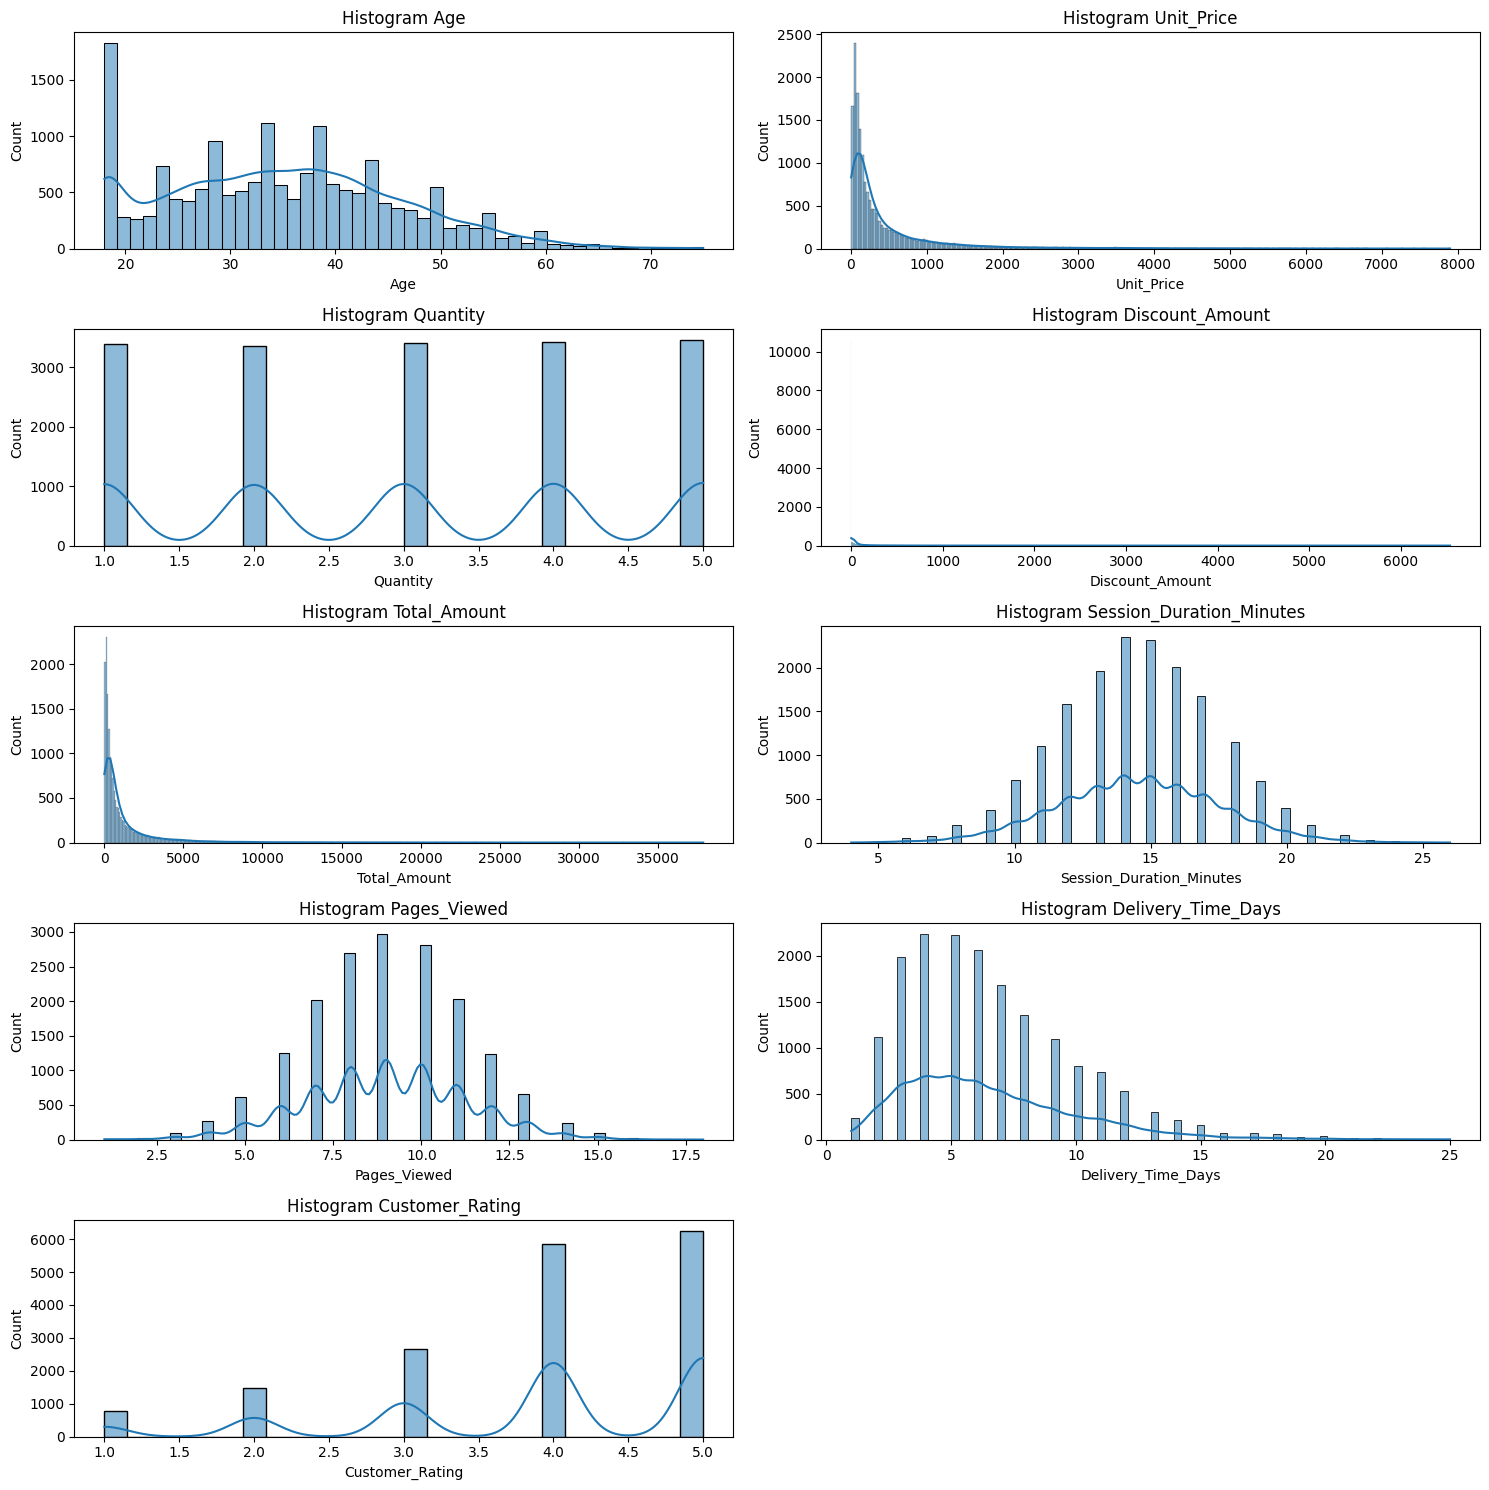

In [12]:
fig = plt.figure(figsize=(15,15))

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(5,2,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"Histogram {kolom}")
    fig.tight_layout()
plt.show()

Kesimpulan dari Histogram
1. `Age` : Mayoritas customer berada pada rentang usia 18–45 tahun

Pelanggan usia produktif cenderung memiliki daya beli stabil, aktif berbelanja online, dan sering melakukan transaksi berulang. Mereka juga merupakan kelompok yang paling berpotensi menjadi loyal customers.

2. `Unit_Price` : didominasi oleh barang bernilai rendah.

3. `Quantity` : Jumlah pembelian yang dilakukan stabil dengan variasi 1 - 5 pcs.

4. `Discount_Amount` : Diskon yang diberikan ada dengan jumlah yang kecil

5. `Total_Amount` : didominasi transaksi bernilai rendah hingga menengah.

Pelanggan cenderung membeli produk dengan harga terjangkau. Produk premium memang ada, tetapi jumlah penjualannya lebih sedikit.

6. `Session_Duration_Minutes` : Durasi sesi cenderung pendek (10–20 menit)

Pelanggan bersifat efisien—masuk, memilih produk, dan checkout dengan cepat.

7. `Pages_Viewed` : Jumlah halaman yang dilihat relatif sedang (6–12 halaman).

8. `Delivery_Time` : didominasi 3-7 hari pengiriman.

9. `Customer_Rating` : didominasi rating tinggi (4–5).

Pengalaman pembelian (delivery, kualitas produk, layanan) dinilai positif oleh mayoritas pelanggan.

### Outlier

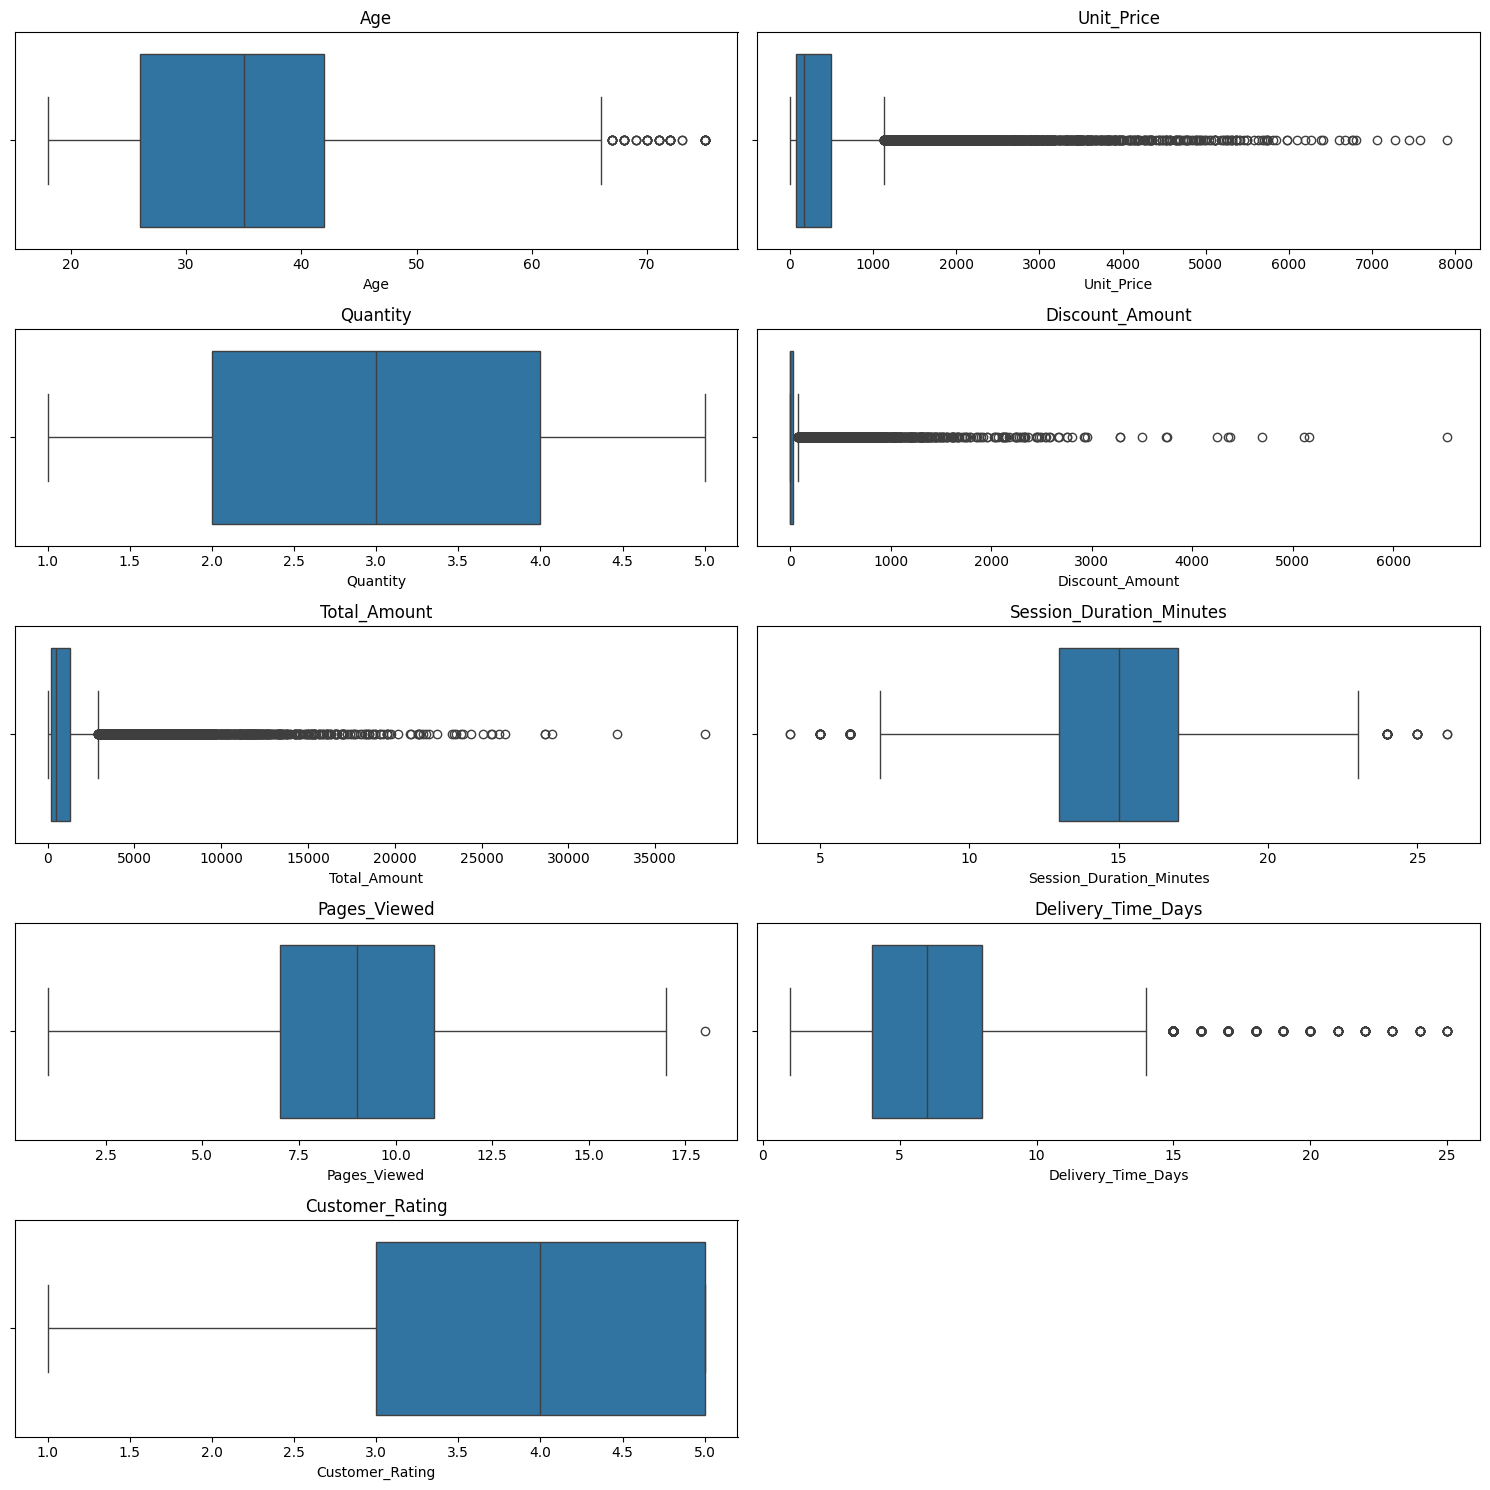

In [13]:
numerik = df.select_dtypes(include= 'number')
fig = plt.figure(figsize=(15,15)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(5,2,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

ditemukan Outlier pada variabel `Age`, `Unit_Price`, `Quantity`, `Discount_Amount`, `Total_Amount`, `Session_Duration_Minutes`, `Pages_Views`, dan `Delivery_Time`. Meskipun ditemukan Outlier, penghapusan data tidak dilakukan karena variabel `Total_Amount` dapat mewakili segmen Loyal, sedangkan variabel lainnya tidak dipakai dalam analisis RFM sehingga Outlier tidak berpengaruh pada analisis ini.

### Correlation

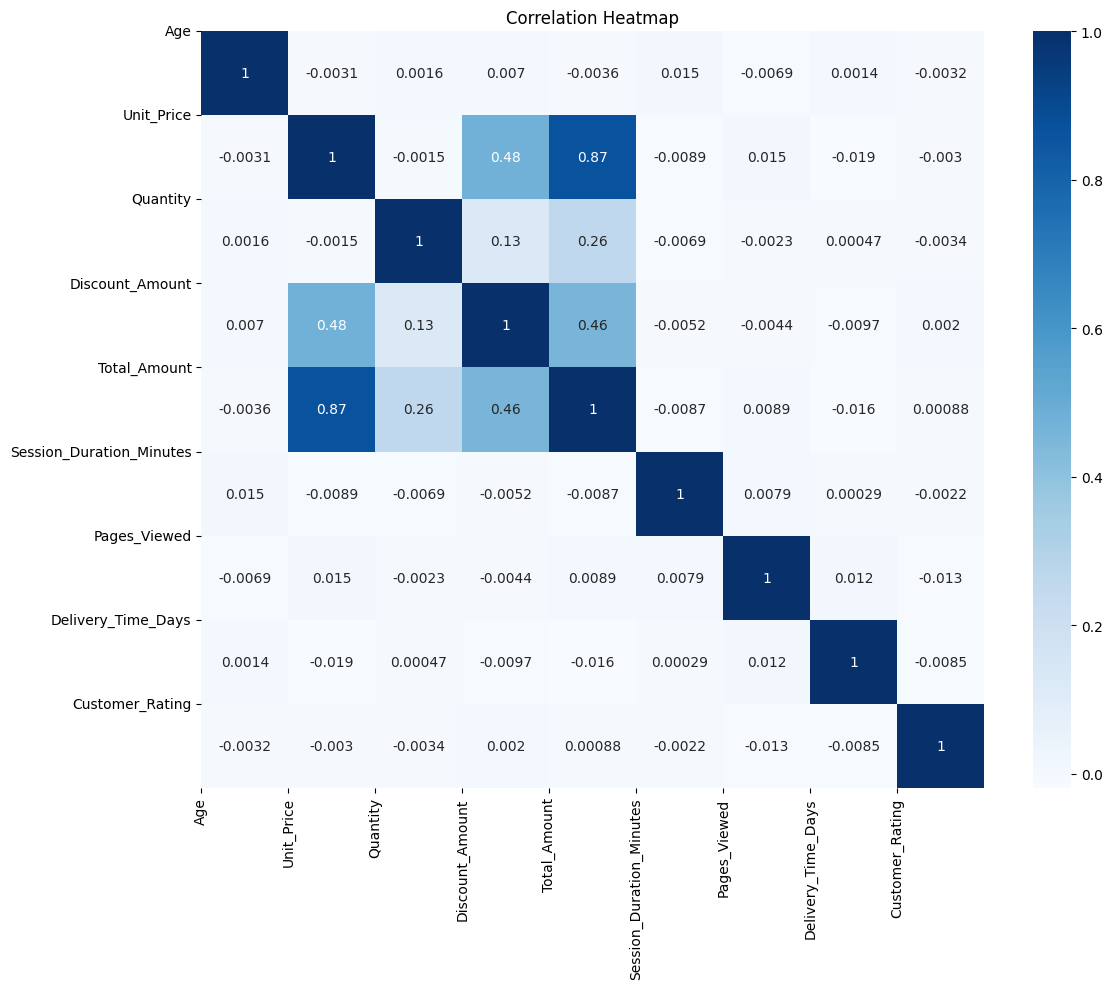

In [14]:
# Ambil kolom numerik saja
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
corr_matrix = numeric_df.corr()

# Plot heatmap menggunakan matplotlib
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")

# Label sumbu
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.tight_layout()
plt.show()

Kesimpulan dari Heatmap Korelasi
1. Korelasi kuat antara `Total_Amount` dan `Unit_Price` (correlation = 0.87) dimana unit price adalah variabel pembentuk total_amount

2. Korelasi medium antara `Unit_Price` - `Discount_Amount` (correlation = 0.48) dan `Total_Amount` - `Discount_Amount` (correlation = 0.46).
Discount_Amount akan memengaruhi Unit_price dan Total_Amount pada setiap transaksi yang dilakukan.

3. Korelasi lemah antar variabel aktivitas pelanggan

Variabel seperti `Session_Duration_Minutes` dan `Pages_Viewed` menunjukkan korelasi lemah dengan variabel transaksi seperti Quantity atau Total_Amount.
Durasi sesi dan jumlah halaman yang dilihat tidak selalu berhubungan langsung dengan besar transaksi. Pelanggan bisa saja browsing lama tanpa membeli banyak, atau membeli cepat tanpa menjelajah banyak halaman.

4. Korelasi lemah antara `Age` dan variabel lainnya

Usia tidak memiliki korelasi yang signifikan dengan aktivitas pembelian. Perilaku belanja pelanggan di dataset ini tidak banyak dipengaruhi oleh kelompok usia.

5. Korelasi lemah pada `Customer_Rating`

`Customer_Rating` tidak menunjukkan hubungan signifikan dengan `Total_Amount`, `Quantity`, maupun `Session_Duration`.

Rating kepuasan lebih dipengaruhi oleh faktor yang tidak tercatat dalam dataset, seperti layanan pengiriman, pengalaman checkout, atau kualitas produk setelah sampai.

Sebelum proses data cleaning dilakukan, dataset E-commerce Customer Behavior memiliki 17.049 baris dan 18 kolom utama. Karena tidak ditemukan data duplikat dan missing values, dataset yang dimiliki setelah proses data cleaning tetap memiliki 17.049 baris dan 18 kolom utama.

### Data Kategorik

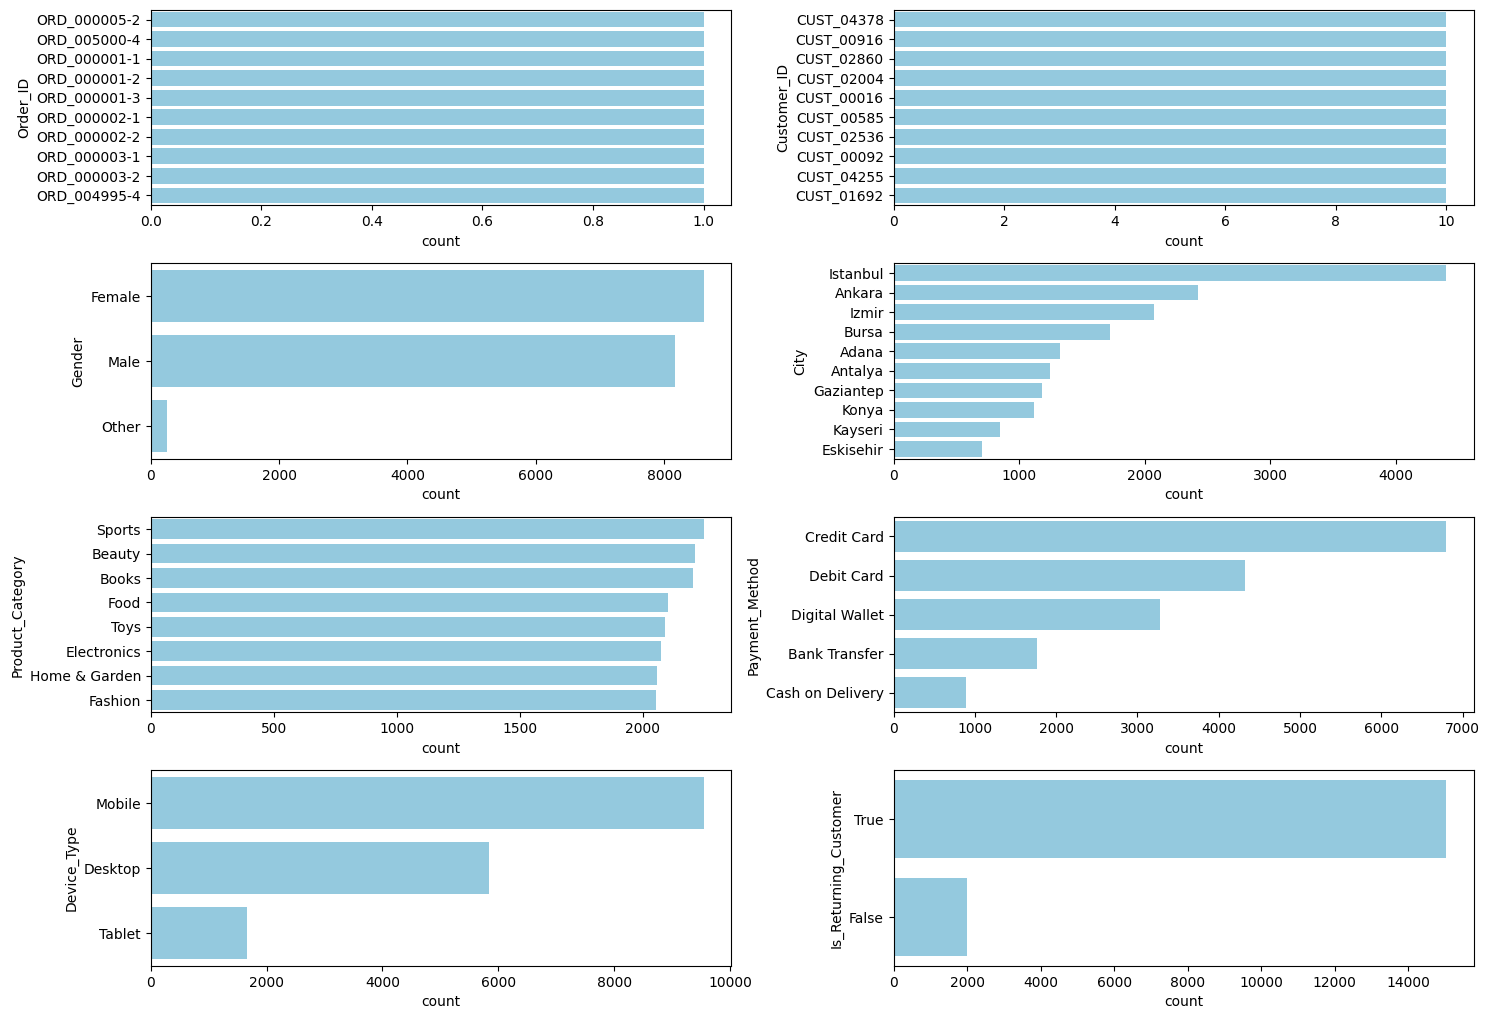

In [15]:
kategorik = df.select_dtypes(include= ('object','bool'))
count = 0
fig = plt.figure(figsize=(15,20))
for kolom in kategorik.columns:
    count += 1
    plt.subplot(8,2,count)
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(10).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

- `Order_ID` : kode transaksi unik pada dataset
- `Customer_ID` : Customer paling banyak melakukan 10 kali transaksi pada rentang waktu 01 Januari 2023 sampai 25 Maret 2024
- `Gender` : Customer paling banyak berjenis kelamin Female
- `City` : Customer paling banyak berada di Kota Istanbul
- `Product_Category` : Customer paling banyak membeli barang dengan kategori sport
- `Payment_Method` : Customer paling banyak membayar menggunakan metode Credit_Card
- `Device_Type` : Customer paling banyak mengakses E-Commerce untuk melakukan transaksi menggunakan device Mobile.
- `Is_Returning_Customer` : Customer paling banyak adalah customer yang kembali lagi untuk berbelanja dibanding yang hanya 1 kali berbelanja di E-Commerce ini.

## Cleaned Data
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [16]:
listItem = []

for col in df.columns:
    unique_vals = df[col].dropna().drop_duplicates()

    # Ambil sample aman (1 atau 2)
    if len(unique_vals) >= 2:
        sample_vals = list(unique_vals.sample(2).values)
    elif len(unique_vals) == 1:
        sample_vals = [unique_vals.iloc[0]]
    else:
        sample_vals = ["No Data"]

    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        df[col].nunique(),
        sample_vals
    ])

dfDesc = pd.DataFrame(
    listItem,
    columns=['dataFeatures','dataType','null','unique','uniqueSample']
)

print(df.shape)
dfDesc

(17049, 18)


,dataFeatures,dataType,null,unique,uniqueSample
0,Order_ID,object,0,17049,"[ORD_001066-2, ORD_000591-6]"
1,Customer_ID,object,0,5000,"[CUST_02566, CUST_01364]"
2,Date,datetime64[ns],0,450,"[2023-05-02T00:00:00.000000000, 2023-04-04T00:00:00.000000000]"
3,Age,int64,0,57,"[45, 68]"
4,Gender,object,0,3,"[Female, Male]"
5,City,object,0,10,"[Antalya, Istanbul]"
6,Product_Category,object,0,8,"[Electronics, Books]"
7,Unit_Price,float64,0,14711,"[4117.21, 81.83]"
8,Quantity,int64,0,5,"[3, 1]"
9,Discount_Amount,float64,0,5526,"[249.18, 103.13]"


In [17]:
df.to_excel('E-Commerce_Customer_Behavior_Cleaned.xlsx')

## Data Analysis

Setelah melalui proses pembersihan dan persiapan data untuk analisis lanjutan, proses analisis dilanjutkan dengan membuat Tabel RFM. Tabel RFM dibuat berdasarkan informasi dari dataset awal dan terdiri dari 9 kolom, yaitu:

1. Customer ID → Kode unik dari tiap customer yang pernah belanja.
2. Recency → selisih hari sejak transaksi terakhir.
3. Frequency → jumlah total transaksi setiap pelanggan.
4. Monetary → total pengeluaran pelanggan dari seluruh transaksi.
5. R_score → skor recency (1–5) berdasarkan kuantil.
6. F_score → skor frequency (1–5) untuk mengukur intensitas belanja.
7. M_score → skor monetary (1–5) berdasarkan total nilai belanja.
8. RFM_Score → total skor R + F + M.
9. Segment → klasifikasi tingkat pelanggan (Platinum, Gold, Silver, Bronze, At Risk).

Penambahan fitur-fitur ini bertujuan untuk memberikan wawasan yang lebih mendalam mengenai perilaku belanja pelanggan serta mendukung proses segmentasi yang lebih akurat.

#### Tabel RFM & Segmentasi Customer

In [18]:
# Tanggal referensi max tanggal + 1 hari
reference_date = df["Date"].max() + pd.Timedelta(days=1)

# Group by customer
rfm = df.groupby("Customer_ID").agg({
    "Date": lambda x: (reference_date - x.max()).days,   # Recency
    "Order_ID": "nunique",                               # Frequency
    "Total_Amount": "sum"                                # Monetary
}).reset_index()

In [19]:
rfm.head()

,Customer_ID,Date,Order_ID,Total_Amount
0,CUST_00001,112,3,2199.63
1,CUST_00002,284,2,809.90
2,CUST_00003,83,2,3030.81
3,CUST_00004,42,1,383.22
4,CUST_00005,279,3,2422.73


In [20]:
rfm.columns = ["Customer_ID", "Recency", "Frequency", "Monetary"]

# Recency lebih baik jika lebih kecil → scoring terbalik
rfm["R_score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])

# Frequency & Monetary lebih besar lebih baik → scoring normal
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["M_score"] = pd.qcut(rfm["Monetary"].rank(method="first"), 5, labels=[1,2,3,4,5])

# Total RFM Score
rfm["RFM_Score"] = rfm["R_score"].astype(int) + rfm["F_score"].astype(int) + rfm["M_score"].astype(int)

Segment Customer:
- Platinum: Pelanggan paling bernilai yang sangat sering berbelanja, bernilai tinggi, dan sangat loyal.

- Gold: Pelanggan bernilai tinggi dengan pola belanja kuat dan potensi besar untuk ditingkatkan.

- Silver: Pelanggan dengan aktivitas moderat yang masih dapat ditingkatkan melalui promosi ringan.

- Bronze: Pelanggan beraktivitas rendah dengan nilai transaksi kecil dan keterlibatan minimal.

- At Risk: Pelanggan yang sebelumnya aktif tetapi sudah lama tidak berbelanja dan berisiko churn.

In [21]:
def segment_customer(score):
    if score >= 13:
        return "Platinum (Best Customers)"
    elif score >= 10:
        return "Gold (Loyal Customers)"
    elif score >= 7:
        return "Silver (Potential Loyal Customer)"
    elif score >= 5:
        return "Bronze (Needs Attention)"
    else:
        return "At Risk"

rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)

In [22]:
print(f'Jumlah baris dan kolom di dataset rfm adalah {rfm.shape}')
rfm.info()

Jumlah baris dan kolom di dataset rfm adalah (5000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Customer_ID  5000 non-null   object  
 1   Recency      5000 non-null   int64   
 2   Frequency    5000 non-null   int64   
 3   Monetary     5000 non-null   float64 
 4   R_score      5000 non-null   category
 5   F_score      5000 non-null   category
 6   M_score      5000 non-null   category
 7   RFM_Score    5000 non-null   int64   
 8   Segment      5000 non-null   object  
dtypes: category(3), float64(1), int64(3), object(2)
memory usage: 249.8+ KB


Tabel RFM terdiri dari 5000 baris dan 9 kolom utama.

In [23]:
print(rfm.head())
print("\nCustomer Segment Count:")
print(rfm["Segment"].value_counts())

  Customer_ID  Recency  Frequency  Monetary R_score F_score M_score  \
0  CUST_00001      112          3   2199.63       3       3       3   
1  CUST_00002      284          2    809.90       1       1       2   
2  CUST_00003       83          2   3030.81       3       1       3   
3  CUST_00004       42          1    383.22       4       1       1   
4  CUST_00005      279          3   2422.73       1       3       3   

   RFM_Score                            Segment  
0          9  Silver (Potential Loyal Customer)  
1          4                            At Risk  
2          7  Silver (Potential Loyal Customer)  
3          6           Bronze (Needs Attention)  
4          7  Silver (Potential Loyal Customer)  

Customer Segment Count:
Segment
Silver (Potential Loyal Customer)    1392
Gold (Loyal Customers)               1338
Platinum (Best Customers)             941
Bronze (Needs Attention)              765
At Risk                               564
Name: count, dtype: int64


#### Cek Outlier dan Sebaran Data Tabel RFM

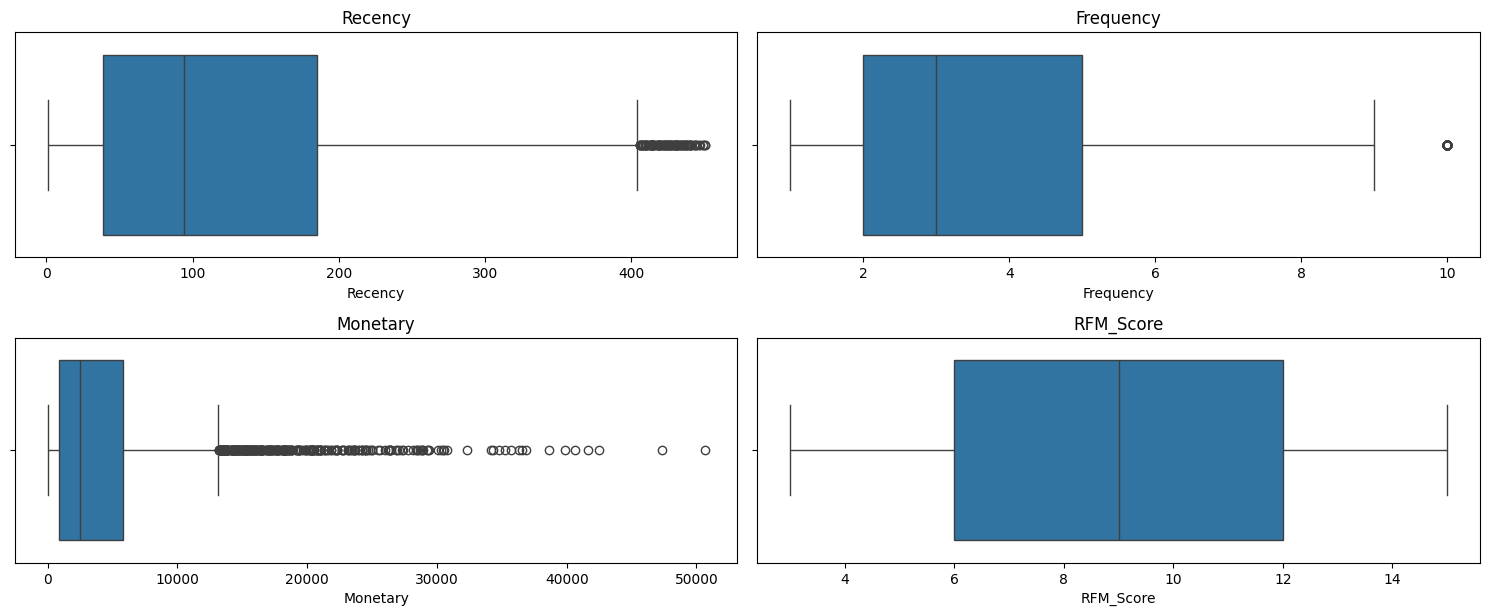

In [24]:
numerik_rfm = rfm.select_dtypes(include= 'number')

#Cek Outlier
fig = plt.figure(figsize=(15,15)) # horizontal, vertikal

count = 0
for kolom in numerik_rfm.columns:
    count += 1
    plt.subplot(5,2,count)
    sns.boxplot(numerik_rfm, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

Ditemukan Outlier pada kolom `Recency`, `Frequency`, dan `Monetary`. Penghapusan data tidak dilakukan karena pelanggan mewakili salah satu segmen yang ada. Untuk menjaga validitas proses segmentasi dilakukan cara Scoring pada ketiga variabel tersebut.

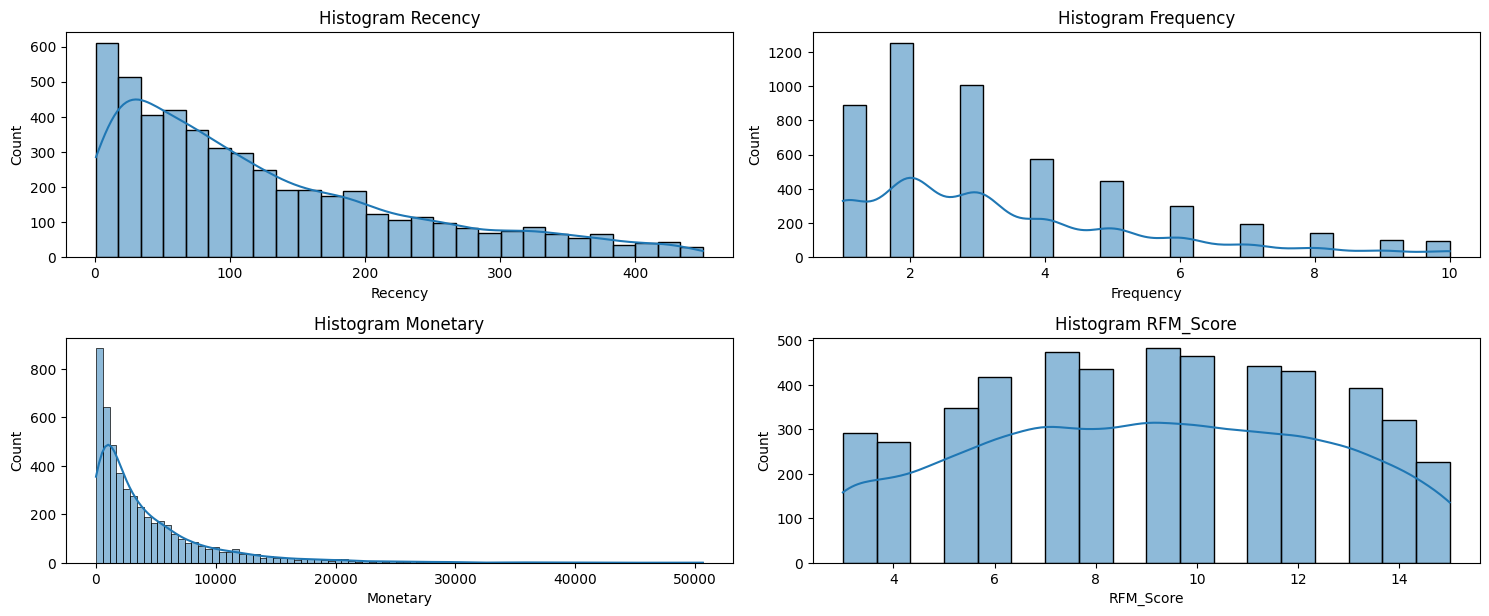

In [25]:
fig = plt.figure(figsize=(15,15))

count = 0
for kolom in numerik_rfm.columns:
    count += 1
    plt.subplot(5,2,count)
    sns.histplot(numerik_rfm[kolom], kde=True)
    plt.title(f"Histogram {kolom}")
    fig.tight_layout()
plt.show()



Kesimpulan Histogram:

1. `Recency` : Mayoritas Customer memiliki Recency sebesar 600 hari.

2. `Frequency` : Mayoritas Customer pernah belanja sebanyak 2 kali transaksi.

3. `Monetary` : Mayoritas uang yang dikeluarkan Customer untuk belanja di E-Commerce memiliki nilai yang rendah.

4. `RFM_Score` : Pelanggan didominasi dengan RFM_Score 8-12.

Pelanggan aktif cenderung memiliki RFM Score tinggi

Ciri pelanggan dengan RFM tinggi:
- Sering melakukan transaksi
- Membeli produk bernilai lebih tinggi
- Tidak lama sejak pembelian terakhir
- Aktif berinteraksi selama sesi belanja (pages viewed & session duration cukup tinggi)

Mereka merupakan loyal customers yang memberikan kontribusi terbesar terhadap pendapatan.

#### Visualisasi Data RFM

##### Pie Chart Persentase Segment RFM

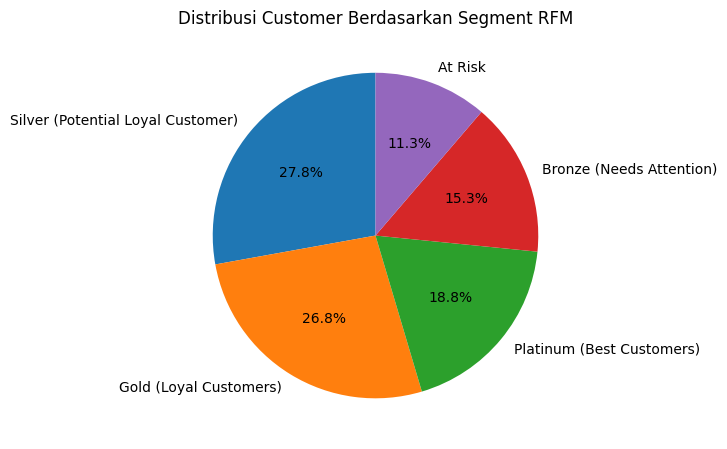

In [26]:
# Count segment
segment_counts = rfm["Segment"].value_counts()

# Pie Chart
plt.figure(figsize=(7,7))
plt.pie(segment_counts, labels=segment_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribusi Customer Berdasarkan Segment RFM")
plt.tight_layout()
plt.show()

##### BarPlot Jumlah Customer per Segment RFM

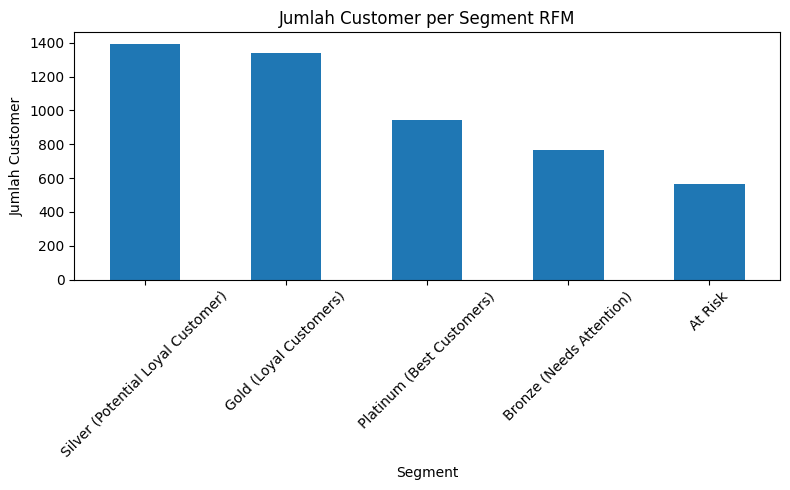

In [27]:
plt.figure(figsize=(8,5))
segment_counts.plot(kind="bar")

plt.title("Jumlah Customer per Segment RFM")
plt.xlabel("Segment")
plt.ylabel("Jumlah Customer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Best-Selling Product

In [28]:
best_selling = df.groupby("Product_Category")["Quantity"].sum().sort_values(ascending=False)
print(best_selling)

Product_Category
Sports           6856
Books            6727
Beauty           6564
Food             6381
Toys             6303
Electronics      6277
Home & Garden    6155
Fashion          6078
Name: Quantity, dtype: int64


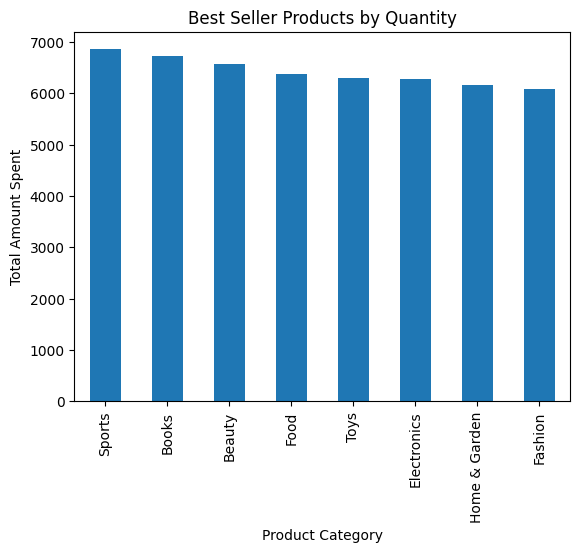

In [29]:
# Bar Graph
best_selling.plot(kind='bar')
plt.title("Best Seller Products by Quantity")
plt.xlabel("Product Category")
plt.ylabel("Total Amount Spent")
plt.show()

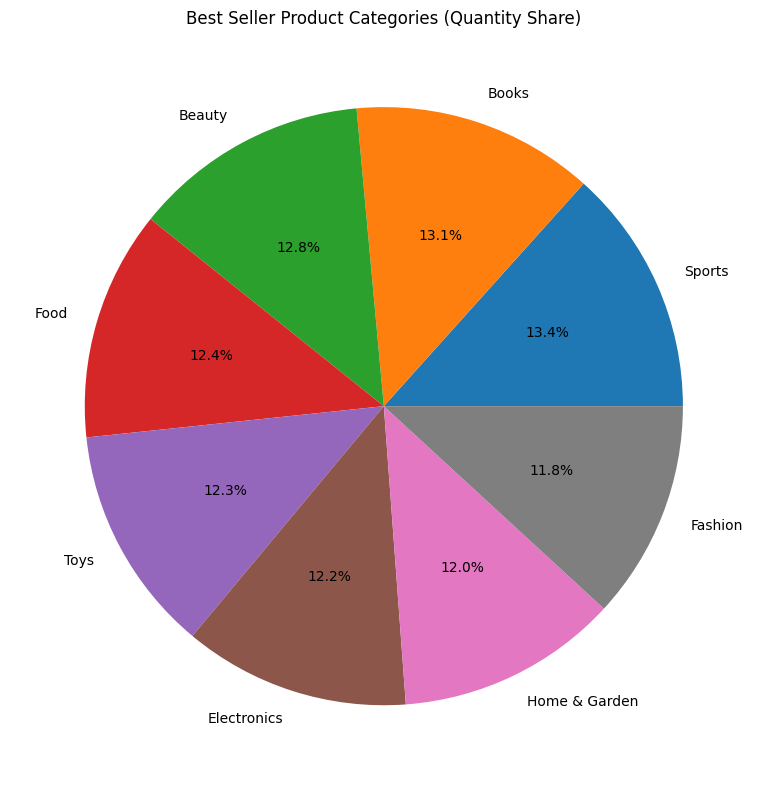

In [30]:
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(best_selling, labels=best_selling.index, autopct='%1.1f%%')
plt.title("Best Seller Product Categories (Quantity Share)")
plt.tight_layout()
plt.show()

# Kesimpulan dan Rekomendasi

## Kesimpulan

Berdasarkan proses data understanding, data cleaning, dan analisis RFM yang telah dilakukan, dapat disimpulkan bahwa perilaku pelanggan e-commerce sangat bervariasi baik dari segi frekuensi transaksi, total nilai belanja, maupun seberapa baru mereka melakukan pembelian terakhir. Penambahan fitur seperti Recency, Frequency, Monetary, serta berbagai skor turunan seperti R_score, F_score, M_score, dan RFM_Score membantu memetakan pelanggan secara lebih akurat ke dalam segment Platinum, Gold, Silver, Bronze, dan At Risk.

Hasil segmentasi menunjukkan bahwa pelanggan dengan skor RFM tinggi memiliki pola belanja yang lebih aktif, nilai transaksi lebih besar, serta menunjukkan kecenderungan loyal terhadap platform. Sebaliknya, pelanggan dengan skor RFM rendah memiliki frekuensi belanja rendah, nilai transaksi kecil, atau sudah lama tidak berbelanja, sehingga berisiko lebih tinggi untuk churn. Dengan demikian, analisis RFM terbukti menjadi metode efektif untuk memahami struktur pelanggan, mengidentifikasi peluang peningkatan nilai pelanggan, serta mendukung strategi personalisasi dan optimisasi kampanye pemasaran.

## Rekomendasi

1. Fokus pada Pelanggan Platinum & Gold (High Value)

Berikan exclusive offers, program loyalti, dan rekomendasi produk personal untuk mempertahankan loyalitas.

Tawarkan early access promo atau bundling premium untuk meningkatkan lifetime value.

2. Optimalkan Pelanggan Silver (Medium Value)

Arahkan promosi berbasis minat produk untuk mendorong peningkatan frekuensi pembelian.

Berikan diskon ringan atau free shipping agar mereka lebih aktif.

3. Reaktivasi Pelanggan Bronze

Kirimkan kampanye reminder seperti “You might like this”, promo first re-purchase, atau win-back campaign.

Gunakan pesan personal dan insentif sederhana untuk memicu transaksi ulang.

4. Tangani Pelanggan At Risk / Dormant

Luncurkan kampanye khusus churn prevention seperti voucher spesifik atau potongan harga untuk kategori favorit.

Analisis penyebab ketidakaktifan (misal: harga, stok, pengalaman buruk) untuk strategi perbaikan jangka panjang.

5. Personalize Marketing Berdasarkan Preferensi Produk

Produk dengan pembelian tinggi seperti elektronik bisa digunakan sebagai anchor product untuk cross-selling.

Bangun rekomendasi produk berbasis histori pembelian dan session behavior.

6. Gunakan Skor RFM untuk Prioritas Kampanye

Alokasikan budget pemasaran lebih besar pada segmen Platinum & Gold karena ROI lebih tinggi.

Minimalkan pengiriman promo ke pelanggan dengan skor RFM sangat rendah untuk menghindari waste marketing.

7. Evaluasi dan Iterasi Secara Berkala

Update skor RFM setiap bulan agar segmentasi tetap relevan.

Pantau perubahan perilaku untuk melihat dampak kampanye terhadap pergeseran segmen.

In [31]:
nama_file_excel = 'E-Commerce_Customer_Behavior_Analysis.xlsx'

with pd.ExcelWriter(nama_file_excel, engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Data_Ecommerce_Cleaned', index=False)
    rfm.to_excel(writer, sheet_name='Data_RFM', index=False)
